In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
proj = '45Sc'
trg = '160Gd'
cn = '205At'
bf = 0.69
ch = 'xn'
sigr = 3.2
bf_diff = 0.01

df10_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_barfac' + f'{bf:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')
df0_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_barfac' + f'{bf:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')

bf_low_10_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_barfac' + f'{bf-bf_diff:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')
bf_high_10_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_barfac' + f'{bf+bf_diff:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')

bf_low_0_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_barfac' + f'{bf-bf_diff:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')
bf_high_0_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_barfac' + f'{bf+bf_diff:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')
df10_mb

,E_lab,E*/MeV,199At,200At,201At,202At,203At,204At,205At
0,168.352,35.0,0.000000e+00,0.000000e+00,8.380000e-13,2.790000e-07,1.690000e-07,1.020000e-10,0.0
1,169.633,36.0,0.000000e+00,0.000000e+00,1.340000e-10,1.670000e-06,6.540000e-07,2.850000e-10,0.0
2,170.915,37.0,0.000000e+00,0.000000e+00,8.610000e-09,9.320000e-06,2.380000e-06,7.630000e-10,0.0
3,172.196,38.0,0.000000e+00,0.000000e+00,2.920000e-07,4.890000e-05,8.240000e-06,2.010000e-09,0.0
4,173.477,39.0,0.000000e+00,0.000000e+00,5.840000e-06,2.380000e-04,2.680000e-05,5.040000e-09,0.0
5,174.758,40.0,0.000000e+00,0.000000e+00,7.140000e-05,1.020000e-03,8.040000e-05,1.230000e-08,0.0
6,176.040,41.0,0.000000e+00,0.000000e+00,5.210000e-04,3.480000e-03,2.040000e-04,2.760000e-08,0.0
7,177.321,42.0,0.000000e+00,0.000000e+00,2.310000e-03,8.580000e-03,4.020000e-04,5.180000e-08,0.0
8,178.602,43.0,0.000000e+00,0.000000e+00,6.960000e-03,1.600000e-02,6.170000e-04,8.040000e-08,0.0
9,179.883,44.0,0.000000e+00,0.000000e+00,1.640000e-02,2.450000e-02,7.810000e-04,9.580000e-08,0.0


## Experimental values with errors

In [15]:
#in ub
e_lab = [181.2,186.6,189.9,194.3,202]
exp = [[np.nan,np.nan,np.nan,2.4,41], [np.nan,35,100,140,330], [100,150,120,140,28], [np.nan,41,np.nan,12,np.nan]]
err_max = [[np.nan,np.nan,np.nan,1.4,7], [np.nan,10,20,10,30], [20,20,20,10,9], [np.nan,14,np.nan,6,np.nan]]
err_min = [[np.nan,np.nan,np.nan,1,7], [np.nan,10,20,10,30], [20,20,20,10,9], [np.nan,14,np.nan,4,np.nan]]

exp = np.array(exp)/1e3
err_max = np.array(err_max)/1e3
err_min = np.array(err_min)/1e3
exp

array([[   nan,    nan,    nan, 0.0024, 0.041 ],
       [   nan, 0.035 , 0.1   , 0.14  , 0.33  ],
       [0.1   , 0.15  , 0.12  , 0.14  , 0.028 ],
       [   nan, 0.041 ,    nan, 0.012 ,    nan]])

## Scaling of the values to mb, ub or nb

In [16]:
dfm10_mb = df10_mb.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')
dfm0_mb = df0_mb.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')

#scale the data to either nb, ub or whatever
dfm10 = dfm10_mb
dfm0 = dfm0_mb
df10 = df10_mb
df0 = df0_mb
bf_low_10 = bf_low_10_mb
bf_high_10 = bf_high_10_mb
bf_low_0 = bf_low_0_mb
bf_high_0 = bf_high_0_mb

mb = 1
ub = 1e3
nb = 1e6

scale = ub
dfm10['CS'] = dfm10_mb['CS']*scale
dfm0['CS'] = dfm0_mb['CS']*scale
df10.iloc[:,2:] = df10_mb.iloc[:,2:] * scale
df0.iloc[:,2:] = df0_mb.iloc[:,2:] * scale
bf_low_10.iloc[:,2:] = bf_low_10_mb.iloc[:,2:] * scale
bf_high_10.iloc[:,2:] = bf_high_10_mb.iloc[:,2:] * scale
bf_low_0.iloc[:,2:] = bf_low_0_mb.iloc[:,2:] * scale
bf_high_0.iloc[:,2:] = bf_high_0_mb.iloc[:,2:] * scale
dfm10.describe()
exp = exp * scale
err_max = err_max * scale
err_min = err_min * scale

## Plotting

/tmp/ipykernel_207227/338548395.py:8: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm10[dfm10['isotope'].isin(list(df10.columns[plot_from+2:-plot_to]))], palette=colors)
/tmp/ipykernel_207227/338548395.py:22: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm0[dfm0['isotope'].isin(list(df10.columns[plot_from+2:-plot_to]))], linestyle='--', legend=None, palette=colors)
/home/adam/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


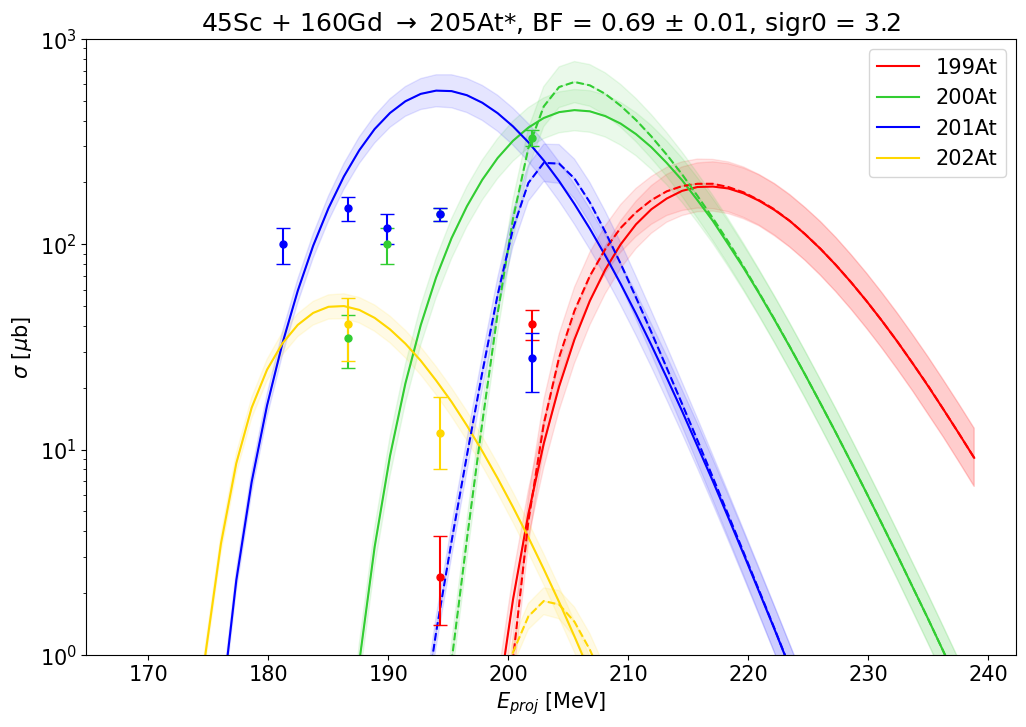

In [17]:
colors = ['red', 'limegreen', 'blue', 'gold', 'black', 'turquoise', 'magenta', 'grey', 'olive', 'brown']
sns.color_palette("dark")

plot_from = 0
plot_to = 3

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm10[dfm10['isotope'].isin(list(df10.columns[plot_from+2:-plot_to]))], palette=colors)
plt.semilogy()
plt.ylim(1e0, 1e3)
# plt.xlim(170, 220)
plt.title(proj + ' + ' + trg + r' $\rightarrow$ ' + cn + '*, BF = ' + str(bf) + ' $\pm$ ' + str(bf_diff) + ', sigr0 = ' + str(sigr))
if scale == mb:
    plt.ylabel('$\sigma$ [mb]')
elif scale == ub:
    plt.ylabel('$\sigma$ [$\mu$b]')
elif scale == nb:
    plt.ylabel('$\sigma$ [nb]')
plt.xlabel('$E_{proj}$ [MeV]')
plt.legend(loc='upper right')

sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm0[dfm0['isotope'].isin(list(df10.columns[plot_from+2:-plot_to]))], linestyle='--', legend=None, palette=colors)

# assymetric errors
for i in range(len(exp)):
    (_, caps, _) = plt.errorbar(e_lab, exp[i], yerr=[err_min[i], err_max[i]], marker='.', capsize=5, color=colors[i], ls='none', markersize=10)
    for cap in caps:
        cap.set_markeredgewidth(1)

# # symmetric errors
# for i in range(len(exp)):
#     (_, caps, _) = plt.errorbar(e_lab, exp[i], yerr=err[i], marker='.', capsize=5, color=colors[i], ls='none', markersize=10)
#     for cap in caps:
#         cap.set_markeredgewidth(1)

# # no errors        
# for i in range(len(exp)):
#     (_, caps, _) = plt.errorbar(e_lab, exp[i], yerr=0, marker='.', capsize=5, color=colors[i], ls='none', markersize=10)
#     for cap in caps:
#         cap.set_markeredgewidth(1)
        
alpha_value = 0.1
for i in range(plot_from+2, len(df10.columns)-plot_to):
    plt.fill_between(df10.iloc[:, 0],  df10.iloc[:, i], bf_low_10.iloc[:, i], color=colors[i-plot_from-2], alpha = alpha_value)
    plt.fill_between(df10.iloc[:, 0],  df10.iloc[:, i], bf_high_10.iloc[:, i], color=colors[i-plot_from-2], alpha = alpha_value)
    plt.fill_between(df0.iloc[:, 0],  df0.iloc[:, i], bf_low_0.iloc[:, i], color=colors[i-plot_from-2], alpha = alpha_value)
    plt.fill_between(df0.iloc[:, 0],  df0.iloc[:, i], bf_high_0.iloc[:, i], color=colors[i-plot_from-2], alpha = alpha_value)

plt.rcParams.update({'font.size': 15})

plt.savefig(proj + '_' + trg + '_' + cn + '_' + ch + '_IFUS10' + '_barfac' + str(bf) + '_sigr' + str(sigr) + '.png')
plt.savefig(proj + '_' + trg + '_' + cn + '_' + ch + '_IFUS10' + '_barfac' + str(bf) + '_sigr' + str(sigr) + '.pdf')